In [1]:
!wget https://www.dropbox.com/scl/fi/ozfqxn7u0gk8qdutxael5/viz.zip?rlkey=gx92o7vq1x10wn4yhta10ccvq&dl=0  -O viz.zip


/bin/bash: line 1: -O: command not found
--2024-02-10 15:34:23--  https://www.dropbox.com/scl/fi/ozfqxn7u0gk8qdutxael5/viz.zip?rlkey=gx92o7vq1x10wn4yhta10ccvq
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd55d19eed2d32e438e7444b0d3.dl.dropboxusercontent.com/cd/0/inline/CNDTL_U3U-GIQ1-ot1GCGHOEZ-4ByxUKOSuT0r3HfSl8__vKo9BUQNPHtn3px9UkS1E8ZhH9RpjCdIyaT61yb-F0xQVnxfyFt-uZTRzG6P98bPshRv86hlMKNUO-KdurKw9AU2GSiIMi__8w2GDVJjWr/file# [following]
--2024-02-10 15:34:24--  https://ucd55d19eed2d32e438e7444b0d3.dl.dropboxusercontent.com/cd/0/inline/CNDTL_U3U-GIQ1-ot1GCGHOEZ-4ByxUKOSuT0r3HfSl8__vKo9BUQNPHtn3px9UkS1E8ZhH9RpjCdIyaT61yb-F0xQVnxfyFt-uZTRzG6P98bPshRv86hlMKNUO-KdurKw9AU2GSiIMi__8w2GDVJjWr/file
Resolving ucd55d19eed2d32e438e7444b0d3.dl.dropboxusercontent.com (ucd55d19eed2d32e438e7444b0d3.dl.dropboxus

In [2]:
!unzip -q viz.zip?rlkey=gx92o7vq1x10wn4yhta10ccvq

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


In [4]:
df=pd.read_csv("./df_viz.csv",encoding="ascii")
display(df.head(2))
df_=pd.read_csv("./final_df_viz.csv",encoding="ascii")
display(df_.head(2))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01


,is_canceled,lead_time,adr,total_of_special_requests,total_guests,add,add_3,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,0,342,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient
1,0,737,0.0,0,2.0,1313,80275,1,7,BB,PRT,Direct,Direct,C,C,No Deposit,Transient


In [5]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='%Y-%m-%d %H:%M:%S')
df['date']=pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')


Percentage of book not canceled: 27.49 % --> (24025 customers)
Percentage of book  canceled: 72.51 % --> (63371 customers)


Text(0, 0.5, 'Total Count')

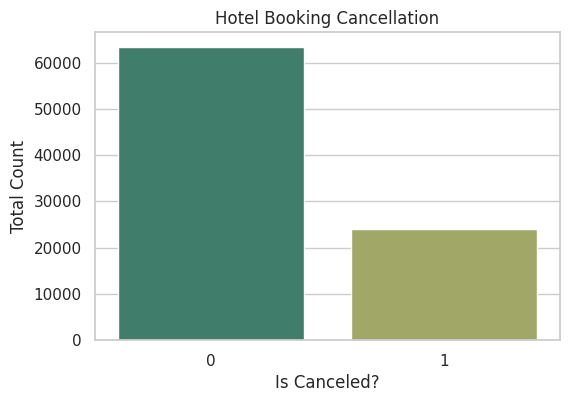

In [6]:
y_target = df.is_canceled

print(f'Percentage of book not canceled: {round(y_target.value_counts(normalize=True)[1]*100,2)} % --> ({y_target.value_counts()[1]} customers)')
print(f'Percentage of book  canceled: {round(y_target.value_counts(normalize=True)[0]*100,2)} % --> ({y_target.value_counts()[0]} customers)')

## is_cancelled
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=df,palette='gist_earth')
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

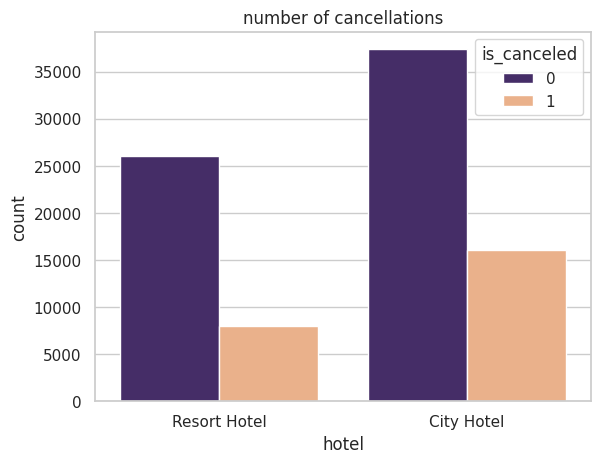

In [7]:
sns.countplot(x = 'hotel',hue = 'is_canceled', data = df, palette=['#432371',"#FAAE7B"])
plt.title("number of cancellations")
plt.show()

<Axes: xlabel='arrival_date_year', ylabel='count'>

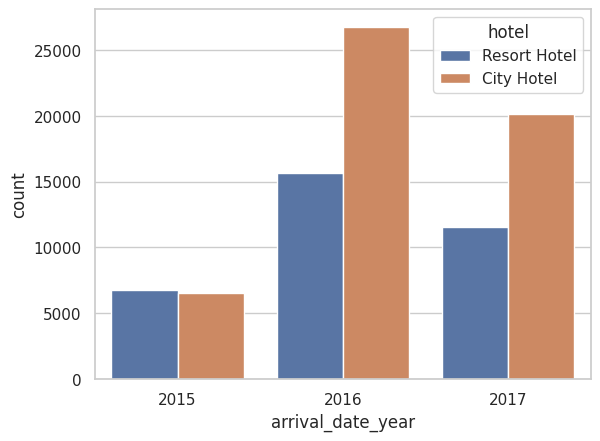

In [8]:
sns.countplot(x = 'arrival_date_year', data = df, hue = 'hotel')


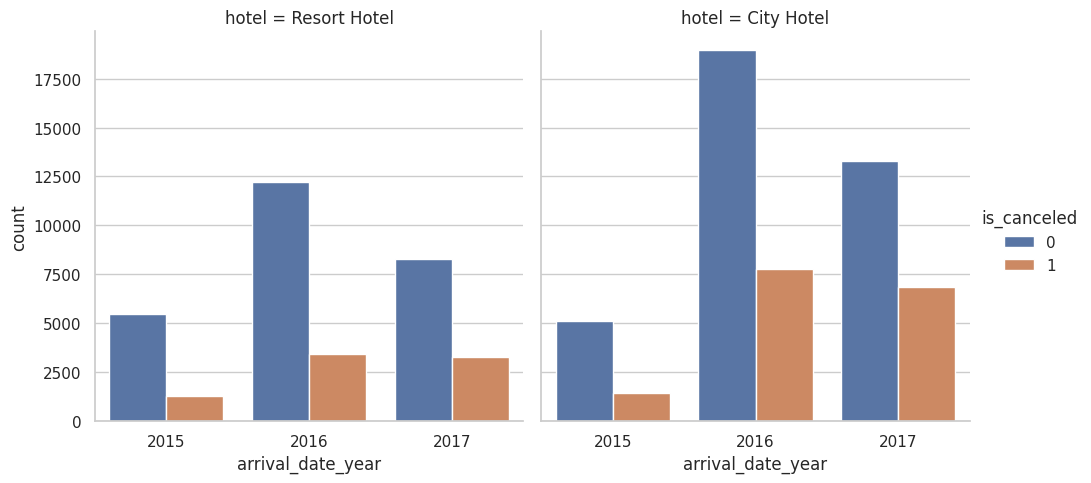

In [9]:
sns.catplot(x ="arrival_date_year", hue="is_canceled", col="hotel", data = df, kind="count")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

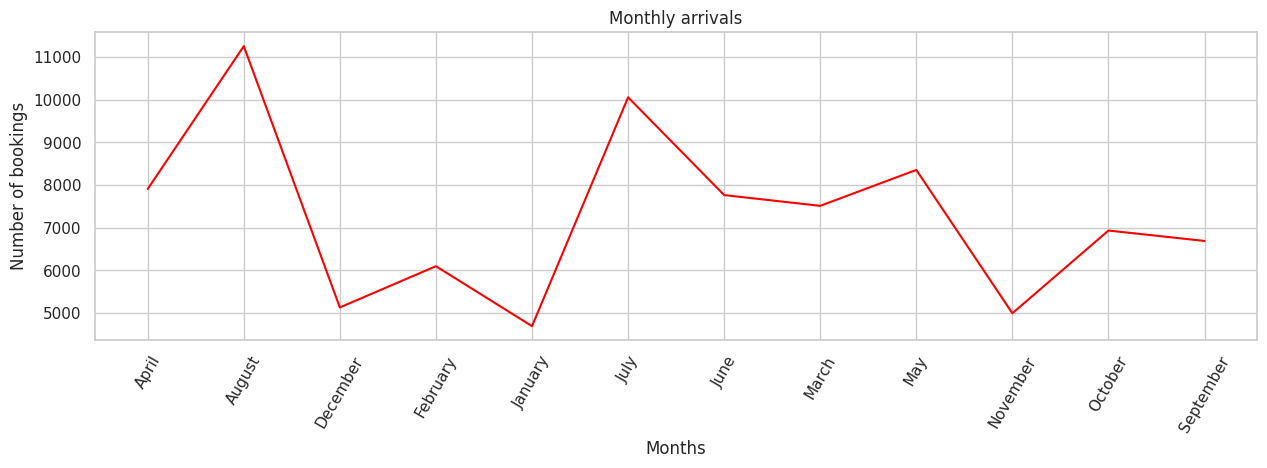

In [10]:
df_year = df.groupby(['arrival_date_month']).agg({'hotel':'count'}).reset_index()

plt.figure(figsize=(15,4))
sns.lineplot(x = "arrival_date_month",y = 'hotel', data = df_year, color = 'red' )
plt.xticks(rotation = 60)
plt.title('Monthly arrivals', )
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.show

In [11]:
df_resort = df[df["hotel"] == 'Resort Hotel']
df_city = df[df["hotel"] == 'City Hotel']
city_booking = df_city.groupby("arrival_date_month")["is_canceled"].count().reset_index()
resort_booking = df_resort.groupby("arrival_date_month")["is_canceled"].count().reset_index()


booking_volume = city_booking.merge(resort_booking,on='arrival_date_month')
booking_volume.columns = ['month','bookings_city','bookings_resort']
booking_volume.round(1)

,month,bookings_city,bookings_resort
0,April,5080,2828
1,August,6591,4666
2,December,3014,2117
3,February,3605,2493
4,January,2730,1963
5,July,5744,4313
6,June,5005,2760
7,March,4856,2657
8,May,5413,2942
9,November,2942,2053


In [12]:
# seasonality by month - city vs. resort
import plotly.express as px

plt.figure(figsize=(10,4))
fig = px.line(booking_volume, x='month',y=["bookings_city", "bookings_resort"],
        title='Booking volume: City Hotel vs. Resort Hotel',
       labels={
                     "value": "Booking Volume",
                     "month": "Month",
                     "variable": "Hotel Type"},
        template = 'plotly_white',
        color_discrete_map={
                 "city_hotel": "#3d405b",
                 "resort_hotel": "#81b29a"
             }
                   )

fig.show()

<Figure size 1000x400 with 0 Axes>

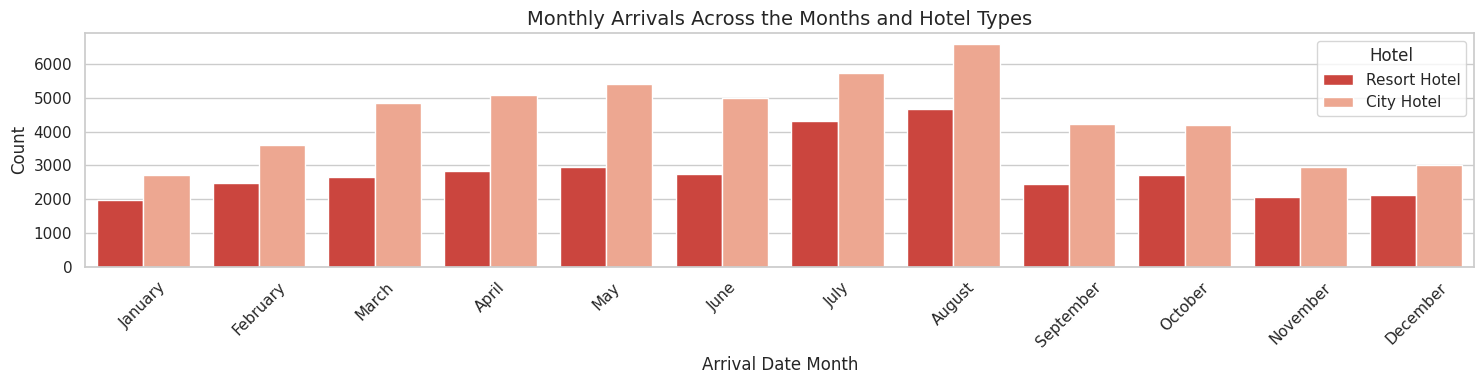

In [13]:
# Create the countplot
month_order = ['January', 'February', 'March', 'April', 'May',
               'June', 'July', 'August', 'September',
               'October', 'November', 'December']
fig = plt.figure(figsize=(15, 4))
ax = sns.countplot(data=df, x='arrival_date_month', hue='hotel', palette="Reds_r", order=month_order)

plt.title('Monthly Arrivals Across the Months and Hotel Types', fontsize=14)
plt.xlabel('Arrival Date Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.tight_layout()
plt.show()

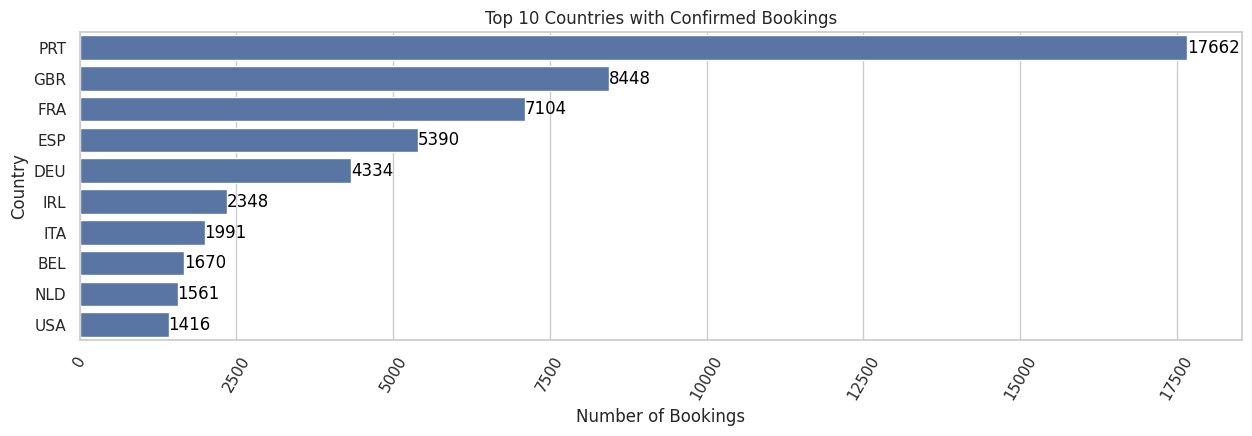

In [14]:
bookings_confirmed = df[df['is_canceled'] == 0]

df_country = bookings_confirmed.groupby(['country']).agg({'hotel':'count'}).reset_index().sort_values(by=['hotel'],ascending=False)[:10]
plt.figure(figsize=(15,4))
sns.barplot(y="country", x='hotel', data=df_country)

# Add numbers to the bars
for index, value in enumerate(df_country['hotel']):
    plt.text(value, index, str(value), color='black', va='center')

plt.xticks(rotation=60)
plt.title('Top 10 Countries with Confirmed Bookings')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.show()

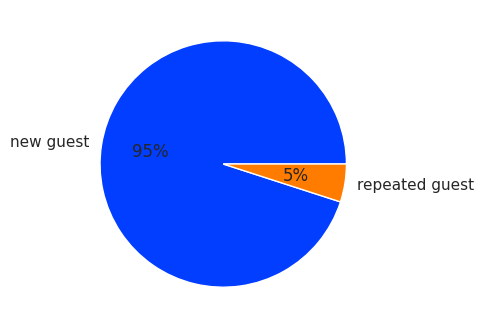

In [15]:
df_pie = bookings_confirmed.groupby(['is_repeated_guest']).agg({'hotel':'count'}).reset_index()
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(10,4))
labels = ['new guest', 'repeated guest']

plt.pie(df_pie['hotel'], labels = labels, colors = colors, autopct='%.0f%%')
plt.show()


In [16]:
repeated_guest=df[df['is_repeated_guest']==1]['adr']
repeated_guest

10725      0.00
11465     90.95
11472     66.00
11486     55.68
11492    130.90
          ...  
85968      0.00
86099     65.00
86199    240.00
86262      0.00
87167    270.00
Name: adr, Length: 3415, dtype: float64

In [17]:
repeated_guest_by_adr=df[df['is_repeated_guest']==1].groupby(['is_repeated_guest',
                                                       'hotel','date']).agg({'adr':'count'}).reset_index()
repeated_guest_by_adr

,is_repeated_guest,hotel,date,adr
0,1,City Hotel,2015-07-02,2
1,1,City Hotel,2015-07-09,2
2,1,City Hotel,2015-07-16,2
3,1,City Hotel,2015-07-23,1
4,1,City Hotel,2015-07-30,1
...,...,...,...,...
1115,1,Resort Hotel,2017-08-27,2
1116,1,Resort Hotel,2017-08-28,2
1117,1,Resort Hotel,2017-08-29,1
1118,1,Resort Hotel,2017-08-30,2


In [18]:
repeated_guest_by_hotel=df[df['is_repeated_guest']==1].groupby(['is_repeated_guest',
                                                       'adr','date']).agg({'hotel':'count'}).reset_index()
repeated_guest_by_hotel

,is_repeated_guest,adr,date,hotel
0,1,-6.38,2017-03-05,1
1,1,0.00,2015-07-16,1
2,1,0.00,2015-08-03,1
3,1,0.00,2015-08-10,1
4,1,0.00,2015-08-12,1
...,...,...,...,...
2631,1,318.00,2017-08-15,1
2632,1,318.82,2017-06-16,1
2633,1,331.00,2017-08-18,1
2634,1,349.00,2017-08-08,1


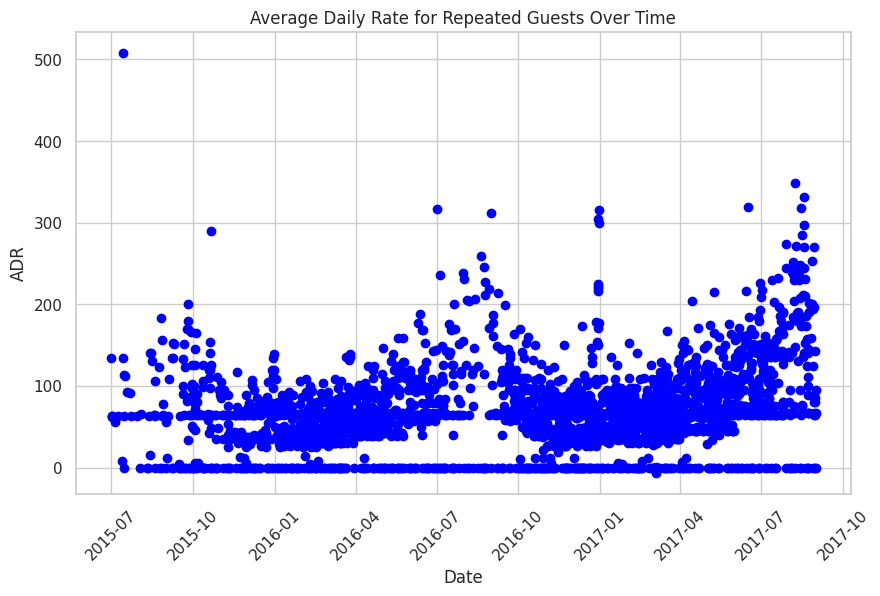

In [19]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(repeated_guest_by_hotel['date'], repeated_guest_by_hotel['adr'], marker='o', color='blue')
plt.xlabel('Date')
plt.ylabel('ADR')
plt.title('Average Daily Rate for Repeated Guests Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

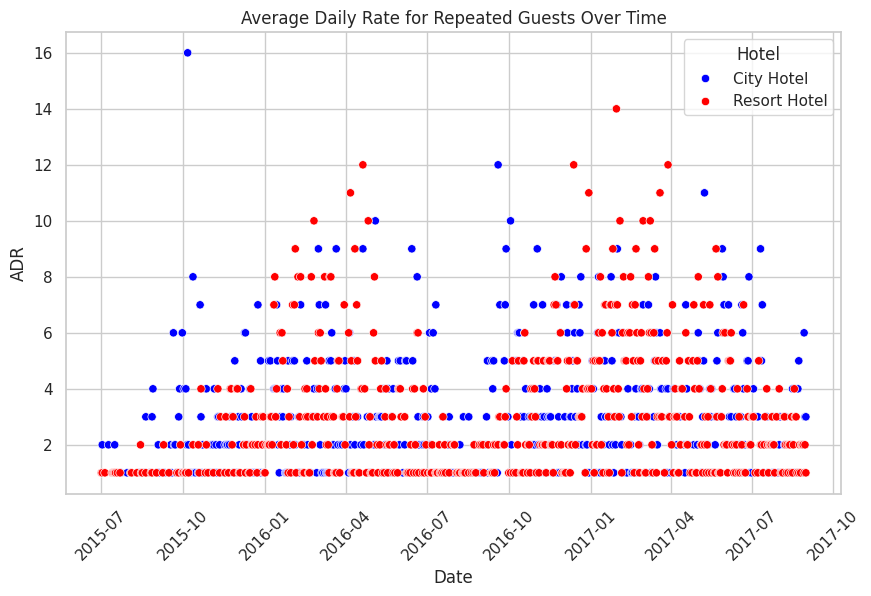

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter plot with hue based on hotel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=repeated_guest_by_adr, x='date', y='adr', hue='hotel', palette=['blue', 'red'], marker='o')

plt.xlabel('Date')
plt.ylabel('ADR')
plt.title('Average Daily Rate for Repeated Guests Over Time')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.grid(True)
plt.show()


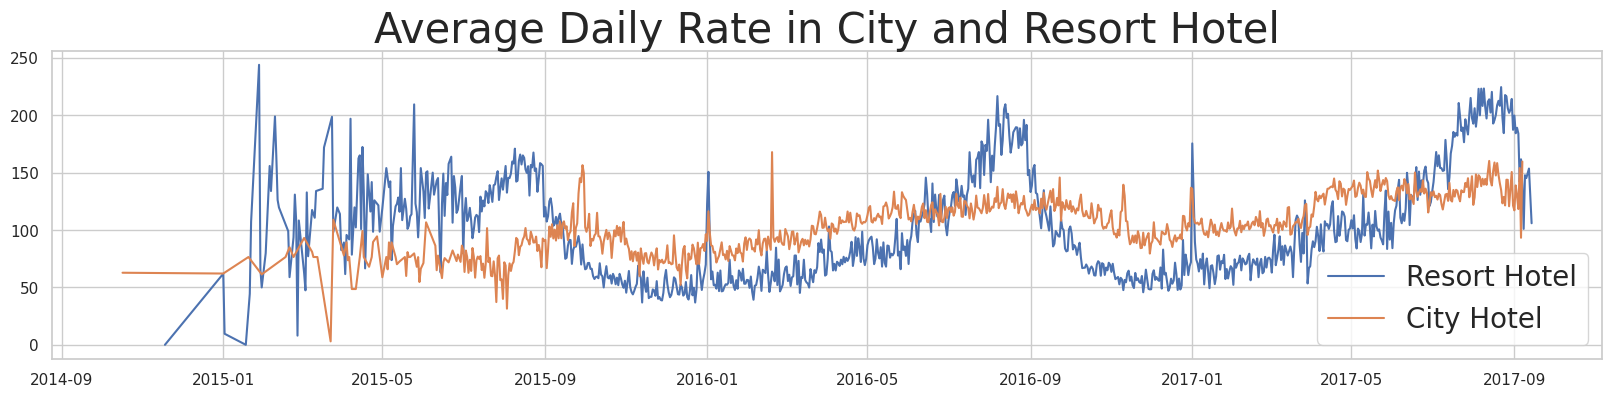

In [21]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize = (20,4))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [22]:
group_meal_data = df.groupby(['hotel','meal']).size().unstack(fill_value=0).transform(lambda x: x/x.sum())
group_meal_data.applymap('{:.2f}'.format)

meal,BB,FB,HB,SC,Undefined
hotel,,,,,
City Hotel,0.61,0.03,0.31,0.99,0.00
Resort Hotel,0.39,0.97,0.69,0.01,1.00


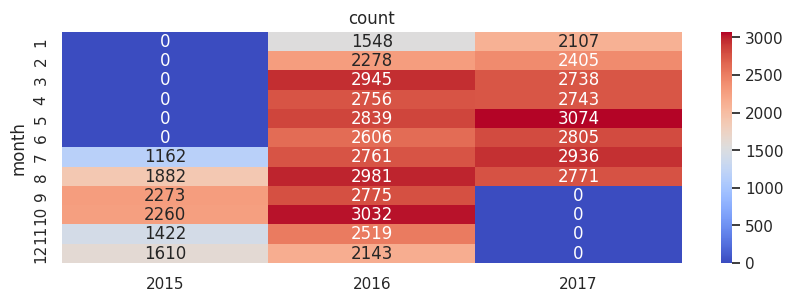

In [23]:
df['year']=df.date.dt.year
df['month']=df.date.dt.month
pivot = df[df['is_canceled']==0].pivot_table( values='is_canceled', index='year',
                                             columns='month', aggfunc='count', fill_value=0).round(2)
new_data=pd.DataFrame(data=pivot.T.values.astype("int64"),
                      columns=list(pivot.index),
                      index=pivot.columns)

f, ax = plt.subplots(figsize=(10, 3))
heatmap = sns.heatmap(data=new_data, annot=True,fmt='.0f', cmap='coolwarm', ax=ax)
heatmap.set_title('count');

<Axes: xlabel='date'>

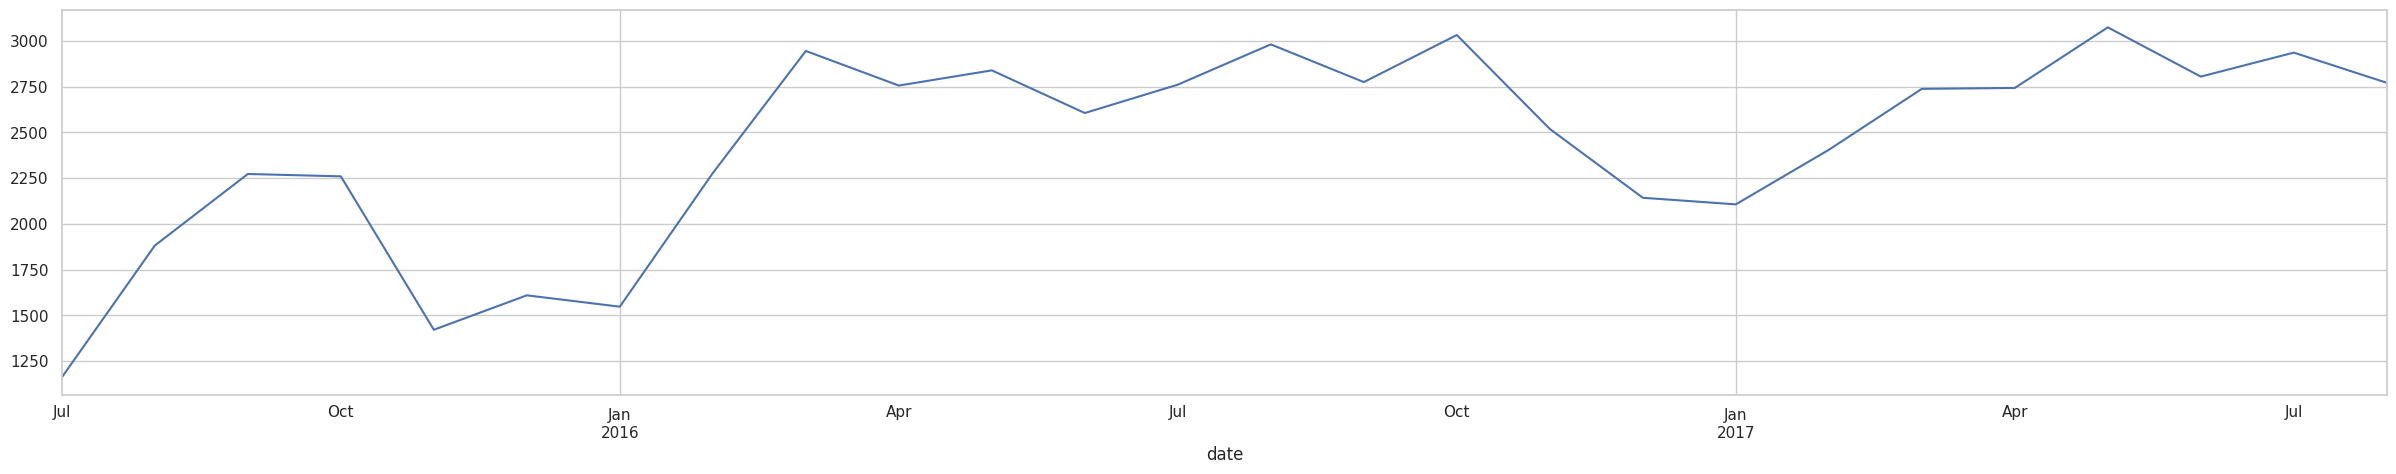

In [24]:
plt.figure(figsize=(30,5))
df[df['is_canceled']==0].groupby(pd.Grouper(key="date", freq="1M"))["is_canceled"].count().plot()

In [25]:
pd.options.mode.chained_assignment = None
def week_function(feature1, feature2, data_source):
    data_source['weekend_or_weekday'] = 0
    for i in range(0, len(data_source)):
        if feature2.iloc[i] == 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekend'
        if feature2.iloc[i] > 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_just_weekday'
        if feature2.iloc[i] > 0 and feature1.iloc[i] > 0:
            df['weekend_or_weekday'].iloc[i] = 'stay_both_weekday_and_weekend'
        if feature2.iloc[i] == 0 and feature1.iloc[i] == 0:
            df['weekend_or_weekday'].iloc[i] = 'undefined_data'

week_function(df['stays_in_weekend_nights'],df['stays_in_week_nights'],df)

In [26]:
df['arrival_date_month']

0          July
1          July
2          July
3          July
4          July
          ...  
87391    August
87392    August
87393    August
87394    August
87395    August
Name: arrival_date_month, Length: 87396, dtype: object

In [27]:
df['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9',
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

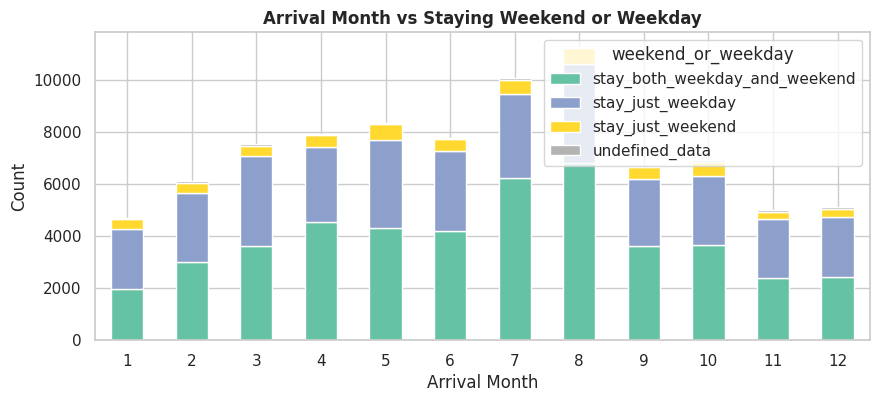

In [28]:
df['arrival_date_month']= df['arrival_date_month'].astype('int64')
group_data = df.groupby([ 'arrival_date_month','weekend_or_weekday']).size().unstack(fill_value=0)
group_data.sort_values('arrival_date_month', ascending = True).plot(kind='bar',stacked=True, cmap='Set2',figsize=(10,4))
plt.title('Arrival Month vs Staying Weekend or Weekday', weight='bold')
plt.xlabel('Arrival Month', fontsize=12)
plt.xticks(rotation=360)
plt.ylabel('Count', fontsize=12)